# Logistic Regression PCA

In [114]:
import numpy as np
import pandas as pd
import sklearn.metrics as m
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
plt.style.use('dark_background')

In [92]:
def print_results(y_hat,y_pred,confusion=True):  
    if confusion:
        confusion = pd.crosstab(y_hat,y_pred)
        confusion.index.name,confusion.columns.name  = 'Observed','Predicted'
        print(confusion)
    accuracy  = m.accuracy_score(y_hat,y_pred)
    precision = m.precision_score(y_hat,y_pred,pos_label='readmitted')
    recall    = m.recall_score(y_hat,y_pred,pos_label='readmitted')
    print(f'\nAccuracy:\n\t{accuracy}\nPrecision:\n\t{precision}\nRecall:\n\t{recall}\n')
    return accuracy,precision,recall

## Data

In [86]:
X_train    = pd.read_csv('X_train.csv').drop('Unnamed: 0',axis=1)
y_train    = pd.read_csv('y_train.csv').readmitted
X_validate = pd.read_csv('X_validate.csv').drop('Unnamed: 0',axis=1)
y_validate = pd.read_csv('y_validate.csv').readmitted
X_test     = pd.read_csv('X_test.csv').drop('Unnamed: 0',axis=1)
y_test     = pd.read_csv('y_test.csv').readmitted

## PCA

Shape:
 (141248, 166)

Explained Variance:
 [0.11665965 0.10260282 0.08935171 0.06223076 0.05724246 0.04775667
 0.04635778 0.04398577 0.03994566 0.03106835 0.02264626 0.01622498
 0.01497904 0.01206645 0.01143223 0.01083963 0.01043916 0.00995774
 0.00936172 0.00844705 0.00764755 0.00733718 0.00714393 0.00701903
 0.00648761 0.00614663 0.0059735  0.00539715 0.0052514  0.00471566
 0.00462263 0.00456191 0.00453008 0.00431393 0.00416886 0.00394358
 0.00384045 0.00368885 0.00356335 0.00354345 0.00331338 0.00325519
 0.00308074 0.00305391 0.00299781 0.00275058 0.00268707 0.0024578
 0.00239612 0.002329   0.00223387 0.00207581 0.00200479 0.00198496
 0.00194692 0.00193679 0.00183855 0.00179606 0.00177711 0.00171658
 0.00168647 0.00165769 0.00162541 0.001592   0.00155761 0.00152224
 0.00150754 0.00149331 0.00143844 0.00136838 0.00131856 0.00131352
 0.00130414 0.00125865 0.00122881 0.00120864 0.00116083 0.00113805
 0.00111494 0.0010817  0.00106427 0.00104841 0.00101041 0.00096446
 0.0009578  0.00093

Text(0.5, 1.0, 'Cumulative Variance of PCA Components')

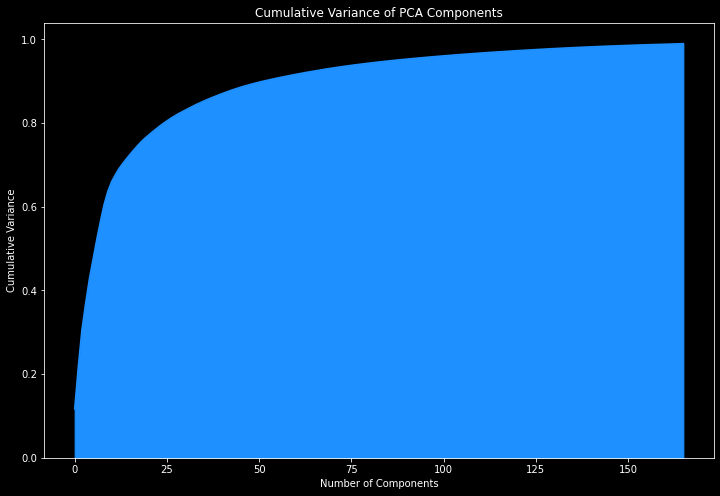

In [127]:
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(X_train)

print('Shape:\n',X_pca.shape)
X_pca = pd.DataFrame(X_pca,columns=[f'Component_{i+1}' for i in range(X_pca.shape[1])])

print('\nExplained Variance:\n',pca.explained_variance_ratio_)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
area = pd.DataFrame({'Cumulative Variance':cumulative_explained_variance,
                     'Number of Components':[c for c in range(len(cumulative_explained_variance))]})

fig,ax = plt.subplots(figsize =(12,8))

area.plot.area(x='Number of Components',
               y='Cumulative Variance',
               legend=False,
               color='dodgerblue',
               ax=ax)

plt.ylabel('Cumulative Variance')
plt.title('Cumulative Variance of PCA Components')

## PCA n component optimization

In [93]:
results = pd.DataFrame(columns = ['accuracy','precision','recall'],
                       index   = [n for n in range(10,291,10)])

for n in range(10,291,10):
    
    print('Principle components:\n\t',n)
    pca = PCA(n_components=n,
              random_state=1984)
    X_train_pca    = pca.fit_transform(X_train)
    X_validate_pca = pca.transform(X_validate)
    X_test_pca     = pca.transform(X_validate)
    
    accuracy,precision,recall = print_results(y_validate,
                                              LogisticRegression().fit(X_train_pca,y_train).\
                                                                   predict(X_validate_pca),False)
    results.loc[n] = [accuracy,precision,recall]
        
results.to_csv('pca_results.csv')

Principle components:
	 10

Accuracy:
	0.650583031765179
Precision:
	0.16151401329095638
Recall:
	0.49338040600176525

Principle components:
	 20

Accuracy:
	0.6284680337756333
Precision:
	0.1548612981416644
Recall:
	0.5075022065313327

Principle components:
	 30

Accuracy:
	0.6267591475673502
Precision:
	0.1567323044172432
Recall:
	0.5198587819947044

Principle components:
	 40

Accuracy:
	0.6241455568958585
Precision:
	0.1576458223857068
Recall:
	0.529567519858782

Principle components:
	 50

Accuracy:
	0.6209288299155609
Precision:
	0.15651041666666668
Recall:
	0.53045013239188

Principle components:
	 60

Accuracy:
	0.6209288299155609
Precision:
	0.15453116815086432
Recall:
	0.5207413945278023

Principle components:
	 70

Accuracy:
	0.6227382388419783
Precision:
	0.15398837823560485
Recall:
	0.5145631067961165

Principle components:
	 80

Accuracy:
	0.6225371934057097
Precision:
	0.1551814834297738
Recall:
	0.5207413945278023

Principle components:
	 90

Accuracy:
	0.63731403297145

/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Accuracy:
	0.6414354644149578
Precision:
	0.16929347826086957
Recall:
	0.5498676081200353

Principle components:
	 160


/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Accuracy:
	0.6392239646160032
Precision:
	0.16684753119913184
Recall:
	0.5428067078552515

Principle components:
	 170


/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Accuracy:
	0.6362082830719743
Precision:
	0.16711301553294056
Recall:
	0.5507502206531333

Principle components:
	 180


/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Accuracy:
	0.6369119420989143
Precision:
	0.1643650148930409
Recall:
	0.5357458075904677

Principle components:
	 190


/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Accuracy:
	0.63681141938078
Precision:
	0.16468361276365603
Recall:
	0.5375110326566638

Principle components:
	 200


/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Accuracy:
	0.6363088057901085
Precision:
	0.16464237516869096
Recall:
	0.5383936451897617

Principle components:
	 210


/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Accuracy:
	0.6342983514274226
Precision:
	0.16267169404793966
Recall:
	0.5330979699911739

Principle components:
	 220


/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Accuracy:
	0.6337957378367511
Precision:
	0.16281569048898442
Recall:
	0.5348631950573698

Principle components:
	 230


/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Accuracy:
	0.6347004422999598
Precision:
	0.16357277374226525
Recall:
	0.5366284201235657

Principle components:
	 240


/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Accuracy:
	0.6338962605548853
Precision:
	0.1634022001609874
Recall:
	0.5375110326566638

Principle components:
	 250


/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Accuracy:
	0.6334941696823482
Precision:
	0.16322701688555347
Recall:
	0.5375110326566638

Principle components:
	 260


/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Accuracy:
	0.6347004422999598
Precision:
	0.16375369723043828
Recall:
	0.5375110326566638

Principle components:
	 270


/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Accuracy:
	0.6362082830719743
Precision:
	0.1645979492714517
Recall:
	0.5383936451897617

Principle components:
	 280


/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Accuracy:
	0.6364093285082428
Precision:
	0.16450567260940033
Recall:
	0.5375110326566638

Principle components:
	 290

Accuracy:
	0.63610776035384
Precision:
	0.16455354734286484
Recall:
	0.5383936451897617



/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [94]:
print(best_accuracy)
print(best_precision)
print(best_recall)

[0.650583031765179, 10]
[0.5383936451897617, 290]
[0, 0]


Text(0.5, 0, 'n Principle Components')

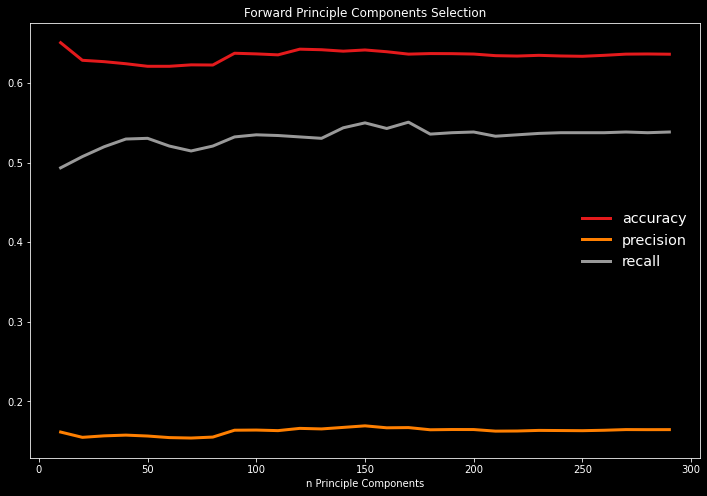

In [126]:
results.plot(figsize =(12,8),
             colormap='Set1',
             linewidth=3)
plt.title('Forward Principle Components Selection')

plt.legend(frameon=False,fontsize='x-large')
plt.xlabel('n Principle Components')

## Best accuracy

In [118]:
pca = PCA(n_components=10,
          random_state=1984)
X_train_pca       = pca.fit_transform(X_train)
X_validate_pca_ac = pca.transform(X_validate)

logit              = LogisticRegression()
logit_fitted_ac    = logit.fit(X_train_pca,y_train)
y_train_predict    = logit_fitted_ac.predict(X_train_pca)
y_validate_predict = logit_fitted_ac.predict(X_validate_pca_ac)

print('Training:')
print_results(y_train,y_train_predict)
print('\nValidate:')
print_results(y_validate,y_validate_predict)

Training:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted           47539       23085
readmitted               34196       36428

Accuracy:
	0.5944650543724513
Precision:
	0.612101557642868
Recall:
	0.5158019936565473


Validate:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted            5913        2902
readmitted                 574         559

Accuracy:
	0.650583031765179
Precision:
	0.16151401329095638
Recall:
	0.49338040600176525



(0.650583031765179, 0.16151401329095638, 0.49338040600176525)

## Best Precision

In [119]:
pca = PCA(n_components=290,
          random_state=1984)
X_train_pca       = pca.fit_transform(X_train)
X_validate_pca_pr = pca.transform(X_validate)

logit              = LogisticRegression()
logit_fitted_pr    = logit.fit(X_train_pca,y_train)
y_train_predict    = logit_fitted_pr.predict(X_train_pca)
y_validate_predict = logit_fitted_pr.predict(X_validate_pca_pr)

print('Training:')
print_results(y_train,y_train_predict)
print('\nValidate:')
print_results(y_validate,y_validate_predict)

/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted           46365       24259
readmitted               25362       45262

Accuracy:
	0.6486959107385591
Precision:
	0.6510550768832439
Recall:
	0.6408869506116901


Validate:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted            5718        3097
readmitted                 523         610

Accuracy:
	0.63610776035384
Precision:
	0.16455354734286484
Recall:
	0.5383936451897617



(0.63610776035384, 0.16455354734286484, 0.5383936451897617)

## Best Recall

In [120]:
pca = PCA(n_components=170,
          random_state=1984)
X_train_pca       = pca.fit_transform(X_train)
X_validate_pca_rc = pca.transform(X_validate)

logit              = LogisticRegression()
logit_fitted_rc    = logit.fit(X_train_pca,y_train)
y_train_predict    = logit_fitted_rc.predict(X_train_pca)
y_validate_predict = logit_fitted_rc.predict(X_validate_pca_rc)

print('Training:')
print_results(y_train,y_train_predict)
print('\nValidate:')
print_results(y_validate,y_validate_predict)

/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted           46333       24291
readmitted               26309       44315

Accuracy:
	0.641764839148165
Precision:
	0.6459347578928957
Recall:
	0.6274779111916629


Validate:
Predicted       not readmitted  readmitted
Observed                                  
not readmitted            5705        3110
readmitted                 509         624

Accuracy:
	0.6362082830719743
Precision:
	0.16711301553294056
Recall:
	0.5507502206531333



(0.6362082830719743, 0.16711301553294056, 0.5507502206531333)

## ROC Curves

Text(0.5, 1.0, 'ROC Curve (PCA)')

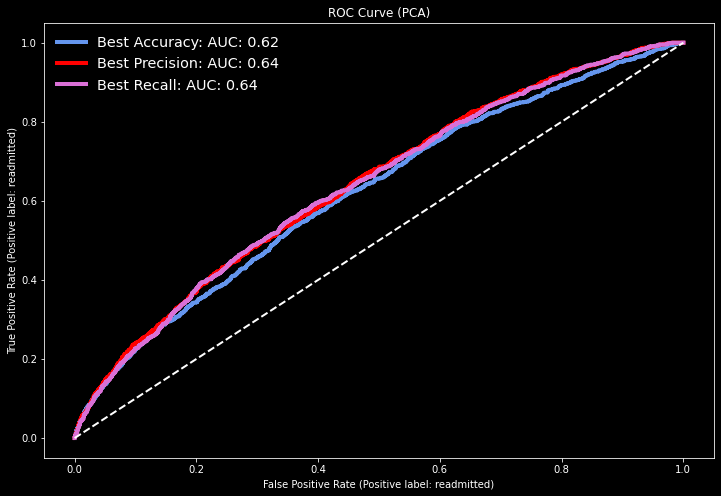

In [125]:
ac_auc = m.roc_auc_score(y_validate, logit_fitted_ac.predict_proba(X_validate_pca_ac)[:,1])
pr_auc = m.roc_auc_score(y_validate, logit_fitted_pr.predict_proba(X_validate_pca_pr)[:,1])
rc_auc = m.roc_auc_score(y_validate, logit_fitted_rc.predict_proba(X_validate_pca_rc)[:,1])

fig,ax = plt.subplots(figsize =(12,8))
m.plot_roc_curve(logit_fitted_ac, 
                 X_validate_pca_ac, 
                 y_validate,
                 label=f'Best Accuracy: AUC: {round(ac_auc,2)}',
                 lw=4,
                 color='cornflowerblue',
                 ax=ax)

m.plot_roc_curve(logit_fitted_pr, 
                 X_validate_pca_pr, 
                 y_validate,
                 label=f'Best Precision: AUC: {round(pr_auc,2)}',
                 lw=4,
                 color='red',
                 ax=ax)

m.plot_roc_curve(logit_fitted_rc, 
                 X_validate_pca_rc, 
                 y_validate,
                 label=f'Best Recall: AUC: {round(rc_auc,2)}',
                 lw=4,
                 color='orchid',
                 ax=ax)

plt.plot([0, 1], 
         [0, 1], 
         color='white', 
         lw=2, 
         linestyle='--')
plt.legend(frameon=False,fontsize='x-large')
plt.title('ROC Curve (PCA)')